># Cacluate seafloor electric ($\mathcal{E}_d$) and magnetic ($\mathcal{H}_d$) fields given a seasurface magnetic field ($\mathcal{H}_o$). This notebook provieds basic calculation of transfer functions needed to calculate $\frac{\mathcal{E}_d}{\mathcal{H}_o}$ and $\frac{\mathcal{H}_d}{\mathcal{H}_o}$ assuming 1D Earth conductivity model.

>- September, 2021. S. Chakraborty (<shibaji7@vt.edu>)

>> ### Simplified 1D Earth conductivity model: conductivity changes with depth only
The models used in this study are SU1 and BM1 ocean model. Following equations from [Boteler et al. (2003)](https://link.springer.com/article/10.1007%2Fs00024-003-2372-6) are used in this study:
$$\frac{\mathcal{E}_d}{\mathcal{H}_o}=Z_d\frac{1}{\cosh{kd}+\frac{Z_d}{Z}\sinh{kd}}$$
$$\frac{\mathcal{H}_d}{\mathcal{H}_o}=\frac{1}{\cosh{kd}+\frac{Z_d}{Z}\sinh{kd}}$$
where: $k=\frac{1+i}{\delta}$, $\delta=\sqrt{\frac{2\rho_s}{\omega\mu_0}}$, thus $kd=(1+i)\frac{d}{\delta}$. Also, $Z,Z_d\sim$ are the characteristic impedence of ocean and seafloor, with $Z=\left(\frac{i\omega\mu_0}{\sigma_s}\right)^{\frac{1}{2}}$, $\sigma_s=\frac{1}{\rho_s}$. $\rho_s$, $d$ are the ocean resistivity and depth, respectively.

>> ## This notebook provides examples of following following operations
* Plots of various transfer functions (TFs), e.g. $\frac{E_d}{E_o}$, $\frac{E_d}{H_o}$, $\frac{H_d}{H_o}$
* Parameters: Ocean depth ($_{ocean}$), sea conductivity ($\rho_s$), seafloor conductivity ($\rho_e$)
* Variations of the TF with frequency, ocean depth, and other parameters under consideration
* Caclulations of seafloor impedance ($Z_d$) considering the Earth as uniform spehere along depth
* Caclulations of seafloor impedance ($Z_d$) considering the Earth as layered spehere along depth

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


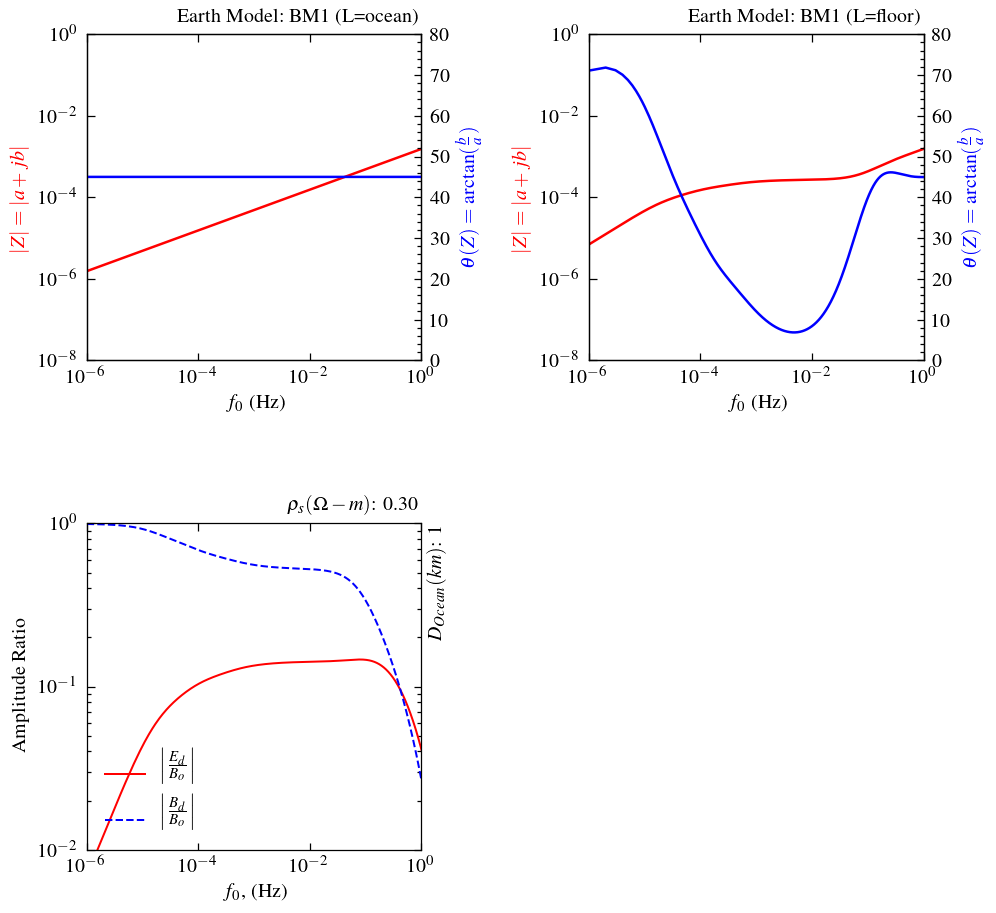

In [1]:
# Import required packages
import bezpy
import matplotlib.pyplot as plt
plt.style.use(['science','ieee'])
import numpy as np
from scipy import constants as C

# Import 1D sea-earth model
from models import BEZpyClass
lo = BEZpyClass(model_name="BM1")
fig = plt.figure(dpi=180, figsize=(6, 6))
lo.plot_impedance(fig.add_subplot(221), layer="ocean")
lo.plot_impedance(fig.add_subplot(222), layer="floor")
tf = lo.calcTF(ax=fig.add_subplot(223))
fig.subplots_adjust(wspace=0.5, hspace=0.5)

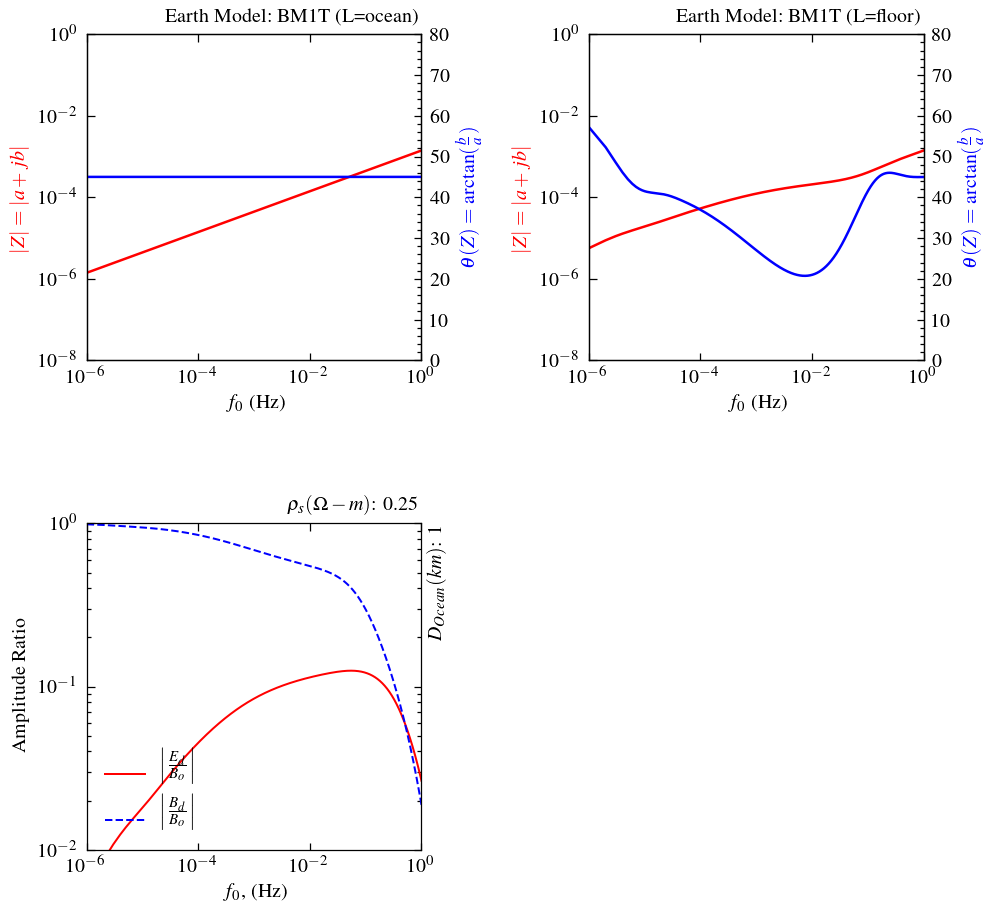

In [2]:
######################################################
# Test case - 1: Create Ben's test model with 
#                modified all the Earth's layer same
#                registivity values (uniform Earth).
######################################################
lo = BEZpyClass(model_name="BM1T")
fig = plt.figure(dpi=180, figsize=(6, 6))
lo.plot_impedance(fig.add_subplot(221), layer="ocean")
lo.plot_impedance(fig.add_subplot(222), layer="floor")
tf = lo.calcTF(ax=fig.add_subplot(223))
fig.subplots_adjust(wspace=0.5, hspace=0.5)

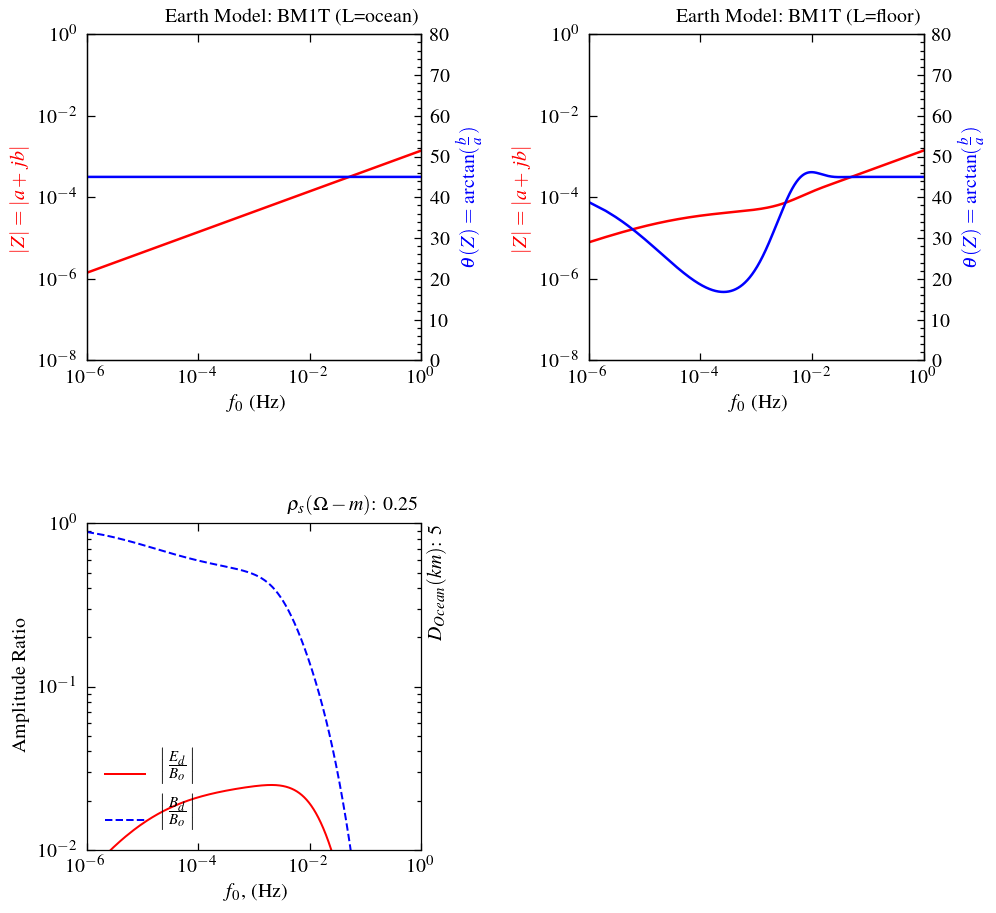

In [3]:
######################################################
# Test case - 2: Create Ben's test model with 
#                modified all the Earth's layer same
#                registivity values (uniform Earth)
#                and sea layer = 5km to replicate 
#                Boteler et al. (2003) results.
######################################################
lo = BEZpyClass(model_name="BM1T")
lo.site.thicknesses[0], lo.site.resistivities[1:] = 5e3, 10.*np.ones(len(lo.site.resistivities[1:]))
fig = plt.figure(dpi=180, figsize=(6, 6))
lo.plot_impedance(fig.add_subplot(221), layer="ocean")
lo.plot_impedance(fig.add_subplot(222), layer="floor")
tf = lo.calcTF(ax=fig.add_subplot(223))
fig.subplots_adjust(wspace=0.5, hspace=0.5)